In [31]:
import statistics
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Materwelon

In [2]:
image = cv2.imread('input\watermelon.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(image)

In [28]:
# Green: 60 degree
# Blue: 120 degree
# H_new = H.copy()
H_new = np.zeros((H.shape[0],H.shape[1]), dtype=np.uint8)
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if 30 < H[i,j] < 90: # Green
            H_new[i,j] = 0
        elif H[i,j] < 30 or H[i,j] > 150: # Red
            H_new[i,j] += 60
            if H_new[i,j] > 180:
                H_new[i,j] -= 180

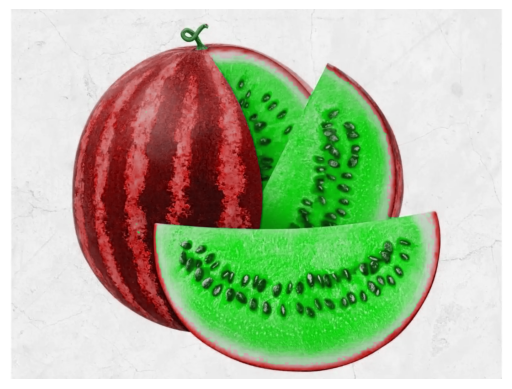

In [29]:
result = cv2.merge((H_new, S, V))
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
plt.imshow(result)
plt.axis('off')
plt.show()

## Color Recognition

In [34]:
cap = cv2.VideoCapture('input/colors.mp4')
_, frame = cap.read()
rows, cols, _ = frame.shape
n = 0

writer = cv2.VideoWriter('output\mamad.mp4', cv2.VideoWriter_fourcc(*'MJPG'), 30, (cols, rows))

while True:
    n+=1
    _, frame_org = cap.read()
    frame_detect = frame_org[(rows//2 - 50):(rows//2 + 50), (cols//2 - 50):(cols//2 + 50)].copy()
    frame_filtered = cv2.blur(frame_org, [15, 15]) 
    cv2.rectangle(frame_filtered, (cols//2 - 50,rows//2 - 50), (cols//2 + 50,rows//2 + 50), 0,8)
    image = cv2.cvtColor(frame_filtered, cv2.COLOR_BGR2HSV)
    # H, S, V = cv2.split(image)
    mean = np.mean(image, axis=(0,1))
    # var = statistics.variance(mean)
    # if mean[2] > (mean[0] + mean[1])*0.9:
    #     color = 'Red'
    # elif mean[1] > (mean[0] + mean[2])*0.9:
    #     color = 'Green'
    # elif mean[0] > (mean[1] + mean[2])*0.9:
    #     color = 'Blue'
    # elif mean[1] > mean[0]*1.7 and mean[2] > mean[0]*1.7:
    #     color = 'Yellow'
    # elif mean[2] > (mean[0] + 30) and mean[2] > (mean[0] + 30):
    #     color = 'Orange'
    # elif mean[2] > mean[1]*2 and mean[0] > mean[1]*2:
    #     color = 'Purple'
    # elif var < 50 and np.mean(mean) > 100:
    #     color = 'White'
    # elif var < 10 and np.mean(mean) < 60:
    #     color = 'Black'
    # else:
    #     color = 'unknown'
    cv2.putText(frame_filtered, str(mean), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 0, thickness= 1)
    # cv2.putText(frame_filtered, color, (150,50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 0, thickness= 1)
    frame_filtered[(rows//2 - 50):(rows//2 + 50), (cols//2 - 50):(cols//2 + 50)] = frame_detect
    writer.write(frame_filtered)
    cv2.imshow('result', frame_filtered)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    if n == 1641:
        break

writer.release()
cap.release()
cv2.destroyAllWindows()


In [33]:
n

450

## Ballons

In [85]:
image_b = cv2.imread('input/ballons.jpg')
hsv = cv2.cvtColor(image_b, cv2.COLOR_BGR2HSV)
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])
mask = cv2.inRange(hsv, lower_hue, upper_hue)
mask = (mask/255).astype(int)
result = cv2.merge([mask * image_b[:,:,0], mask * image_b[:,:,1], mask * image_b[:,:,2]])
cv2.imwrite('output/ballons.jpg',result)

True